<a href="https://colab.research.google.com/github/KiranRaghavendra1248/ML-6/blob/master/Churn_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!pip install -q keras

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="he_uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="he_uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:53: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="glorot_uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:59: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 2s 348us/step - loss: 0.6198 - accuracy: 0.6570 - val_loss: 0.4818 - val_accuracy: 0.8031
Epoch 2/100
5359/5359 [==============================] - 2s 323us/step - loss: 0.4651 - accuracy: 0.7987 - val_loss: 0.4434 - val_accuracy: 0.8092
Epoch 3/100
5359/5359 [==============================] - 2s 333us/step - loss: 0.4368 - accuracy: 0.8099 - val_loss: 0.4283 - val_accuracy: 0.8133
Epoch 4/100
5359/5359 [==============================] - 2s 323us/step - loss: 0.4212 - accuracy: 0.8171 - val_loss: 0.4192 - val_accuracy: 0.8145
Epoch 5/100
5359/5359 [==============================] - 2s 323us/step - loss: 0.4112 - accuracy: 0.8246 - val_loss: 0.4135 - val_accuracy: 0.8148
Epoch 6/100
5359/5359 [==============================] - 2s 322us/step - loss: 0.4033 - accuracy: 0.8257 - val_loss: 0.4080 - val_accuracy: 0.8194
Epoch 7/100
5359/5359 [==============================] - 2s 342us/step

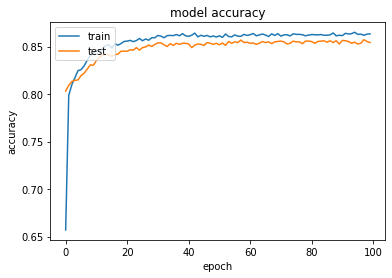

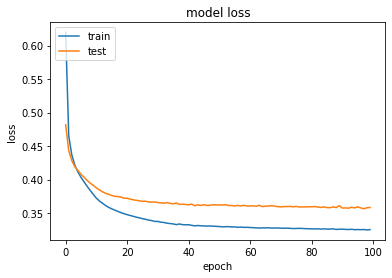

In [ ]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/content/drive/My Drive/ML Datasets/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu',input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 6, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, nb_epoch = 100)

# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [13]:
print(cm)

[[1506   89]
 [ 192  213]]


In [14]:
print(score)

0.8595


In [15]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Activation,Dropout,Dense
def create_model(layers,activation,initializer):
    model=Sequential()
    for i,nodes in enumerate(layers):
        if i==0:
            model.add(Dense(units=nodes,kernel_initializer=initializer,input_dim=11))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(units=nodes,kernel_initializer=initializer))
            model.add(Activation(activation))
            model.add(Dropout(0.2))
    model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
    model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model
layers=[(20,),(20,20),(20,20,20)]
activation=['relu','sigmoid']
initializer=['glorot_uniform','he_uniform']
params=dict(layers=layers,activation=activation,initializer=initializer,batch_size=[128,256],epochs=[30])
# The params in dict are basically what params we give fr model.fit()
from sklearn.model_selection import GridSearchCV
model_=KerasClassifier(build_fn=create_model)
grid=GridSearchCV(model_,param_grid=params,cv=5)
result=grid.fit(X_train,y_train)


Streaming output truncated to the last 5000 lines.
Epoch 2/30
6400/6400 [==============================] - 0s 12us/step - loss: 0.5608 - accuracy: 0.7487
Epoch 3/30
6400/6400 [==============================] - 0s 12us/step - loss: 0.5225 - accuracy: 0.7844
Epoch 4/30
6400/6400 [==============================] - 0s 12us/step - loss: 0.5027 - accuracy: 0.7923
Epoch 5/30
6400/6400 [==============================] - 0s 12us/step - loss: 0.4953 - accuracy: 0.7934
Epoch 6/30
6400/6400 [==============================] - 0s 12us/step - loss: 0.4835 - accuracy: 0.7977
Epoch 7/30
6400/6400 [==============================] - 0s 12us/step - loss: 0.4698 - accuracy: 0.8022
Epoch 8/30
6400/6400 [==============================] - 0s 13us/step - loss: 0.4704 - accuracy: 0.7981
Epoch 9/30
6400/6400 [==============================] - 0s 14us/step - loss: 0.4655 - accuracy: 0.7981
Epoch 10/30
6400/6400 [==============================] - 0s 13us/step - loss: 0.4622 - accuracy: 0.8047
Epoch 11/30
6400/6400

In [16]:
print(result.best_score_)
print(result.best_params_)

0.85
{'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'initializer': 'glorot_uniform', 'layers': (20, 20, 20)}
